In [50]:
"""
Iris Note Book
--------------
Written by Alvin Yap

"""
#core libraries
import pandas as pd
import numpy as np
import warnings as warn
warn.filterwarnings("ignore", category=FutureWarning)
#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns



In [51]:
#define csv name and file location
file_path = 'Iris.csv'
iris_data = pd.read_csv(file_path)

In [52]:
"""
Objective: Determine the class of the flower given the relation between sepal length/width and petal length/width. 
Predict Future flowers based on  our findings as well.
"""

'\nObjective: Determine the class of the flower given the relation between sepal length/width and petal length/width. \nPredict Future flowers based on  our findings as well.\n'

In [53]:
print(iris_data.describe())
print(iris_data.tail())
print('The shape of the iris data set is :'+str(iris_data.shape))

       Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       Petal Width (cm)  
count        150.000000  
mean           1.198667  
std            0.763161  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
     Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
146                6.3               2.5                5.0               1.9   
147               

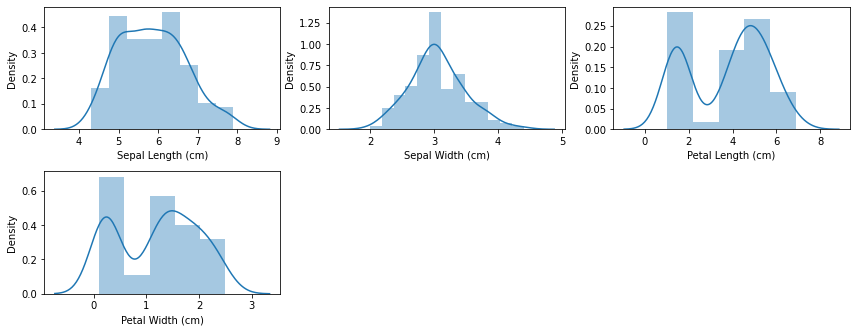

In [54]:
#given the shape, we have 4 attributes and 151 rows
#I want to take a look at the variance, mean, std,skew,outliers,etc of each of the features that are not the class
num_data=iris_data.select_dtypes(exclude=['object'])
fig = plt.figure(figsize=(12,18))
for i in range(len(num_data.columns)):
    fig.add_subplot(8,3,i+1)
    sns.distplot(num_data.iloc[:,i].dropna())
    plt.xlabel(num_data.columns[i])

plt.tight_layout()
plt.show()

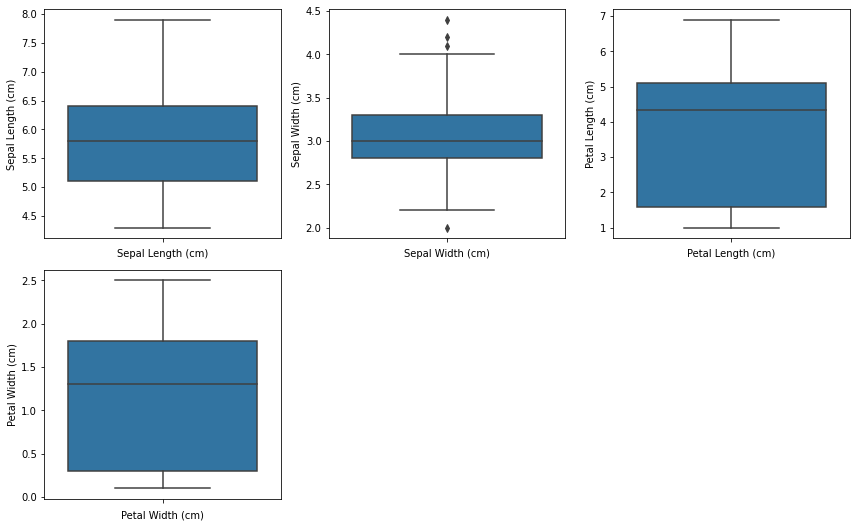

In [55]:

#There also seems to be very little skew so applying  a log transform is unneeded.
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_data.columns)):
    fig.add_subplot(5,3,i+1)
    sns.boxplot(y=num_data.iloc[:,i])
    plt.xlabel(num_data.columns[i])

plt.tight_layout()
plt.show()
    

In [56]:
#I will now decide to do  each  attribute seperated  by the flower sub type
df = pd.DataFrame(iris_data,columns = ['Sepal Length (cm)','Sepal Width (cm)'  ,'Petal Length (cm)','Petal Width (cm)','Class'])
print(df)

     Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   
150                NaN               NaN                NaN               NaN   

              Class  
0    

In [57]:
#isolate the iris-setosa flowers
setosa=df.loc[df['Class'] == 'Iris-setosa']
print(setosa)


    Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
5                 5.4               3.9                1.7               0.4   
6                 4.6               3.4                1.4               0.3   
7                 5.0               3.4                1.5               0.2   
8                 4.4               2.9                1.4               0.2   
9                 4.9               3.1                1.5               0.1   
10                5.4               3.7                1.5               0.2   
11                4.8               3.4 

In [58]:
setosa.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [59]:
versicolor=df.loc[df['Class'] == 'Iris-versicolor']
print(versicolor)

    Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   
55                5.7               2.8                4.5               1.3   
56                6.3               3.3                4.7               1.6   
57                4.9               2.4                3.3               1.0   
58                6.6               2.9                4.6               1.3   
59                5.2               2.7                3.9               1.4   
60                5.0               2.0                3.5               1.0   
61                5.9               3.0 

In [60]:
versicolor.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [61]:
#isolate the iris-setosa flowers
virginica=df.loc[df['Class'] == 'Iris-virginica']
print(virginica)

     Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   
105                7.6               3.0                6.6               2.1   
106                4.9               2.5                4.5               1.7   
107                7.3               2.9                6.3               1.8   
108                6.7               2.5                5.8               1.8   
109                7.2               3.6                6.1               2.5   
110                6.5               3.2                5.1               2.0   
111                6.4      

In [62]:
virginica.describe()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


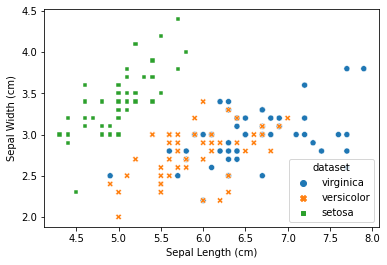

In [63]:
#lets plot the sepal lengths against the width,

concatenated = pd.concat([virginica.assign(dataset='virginica'), versicolor.assign(dataset='versicolor'),setosa.assign(dataset='setosa')])

sns.scatterplot(x='Sepal Length (cm)', y='Sepal Width (cm)', data=concatenated,
               hue="dataset", style='dataset')
plt.show()


    

In [64]:
#based of this information we can  see a clear distinction with the sepal width vs sepal length for setosa, but for virginica and versicolor there is some over lap.

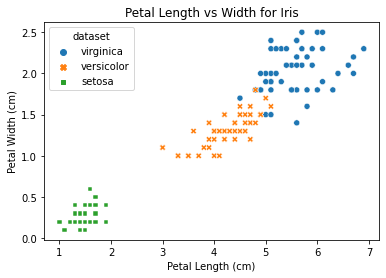

In [65]:
sns.scatterplot(x='Petal Length (cm)', y='Petal Width (cm)', data=concatenated,
               hue="dataset", style='dataset' ).set_title('Petal Length vs Width for Iris')
plt.show()

In [66]:
# if we compare petal length to petal width we have a much better distinction between the 3 groups
# it is time to split the original data into 2 data sets  a training set and  a validation set. I am also going to do a machine learning where we use all 4 variables and one where i 
# narrow it down to just petal length and width  as the deterministic factors.

# for this kind of classification system, it makes sense to do a knn- nearest neighbours.
#import preprocessing for the  name column as this is a non-numerical column
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

le = preprocessing.LabelEncoder()
#we have nan value at the end so lets drop it/
df.drop(df.tail(1).index,inplace=True)
species = df['Class'].tolist()
species_encoded=le.fit_transform(species)
print(species_encoded)

    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [117]:
#now that i have all my data as numerical values, we can preform the analysis.

model = KNeighborsClassifier(n_neighbors=3)

#the feautures that we will be using are the petal width vs petal length and the label/target we're trying to predict is the class



petal_width = df['Petal Width (cm)'].tolist()
petal_length = df['Sepal Length (cm)'].tolist()
sepal_width = df['Sepal Length (cm)'].tolist()
sepal_length = df['Sepal Width (cm)'].tolist()

#these columns don't need to be encoded since they are already numerical values
features=list(zip(petal_width,petal_length))
label = species_encoded
model.fit(features,label)

#with this we can manually put in values and see if it classifies it correctly , but instead lets have it learn on its own and see it's success rate. 

KNeighborsClassifier(n_neighbors=3)

In [107]:
from sklearn.model_selection import train_test_split

target =label


X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [103]:
#so with a neighbours count of 3 , our accuraccy is 97.77% accurate (this value actually goes between 95% --> 98%) lets see what occurs if we increase the neighbours

In [115]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
y_pred2 = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777
